In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../ai_metaphors/Dicts_v2_dir.csv') # lexica from https://osf.io/mghzx

In [5]:
df['Sociability_Dict_Lo'].dropna()

0           unsociability
1          unsociableness
2              unsociable
3          unfriendliness
4              unfriendly
              ...        
381          gruesomeness
382             luridness
383          covetousness
384              jealousy
385    green-eyed monster
Name: Sociability_Dict_Lo, Length: 386, dtype: object

In [20]:
from sentence_transformers import SentenceTransformer

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from sentence_transformers import SentenceTransformer
from nltk.tokenize import sent_tokenize
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sys
from sklearn.metrics import f1_score, accuracy_score
import scipy
import os
# from helper_functions import compute_exaggeration_scores

poles = {}
def encode_sentences(target_series):
    model = SentenceTransformer('all-mpnet-base-v2')
    full_list = []
    for c in target_series:
        try:
            full_list.append(c)
        except TypeError:
            print(c)
    sentence_set = list(set(full_list))
    embeddings = model.encode(sentence_set)
    emb_dict = {}
    for i in range(len(sentence_set)):
        emb_dict[sentence_set[i]] = embeddings[i]
    return emb_dict

def encode_sentences_ser(target_series):
    model = SentenceTransformer('all-mpnet-base-v2')
    sentence_set = []#list(target_series)
    for c in target_series:
        if type(c)==str:
            sentence_set.append(c)
        else:
            sentence_set.append('')
#         except TypeError:
#             print(c)
#     sentence_set = list(set(full_list))
    embeddings = model.encode(sentence_set)
#     emb_dict = {}
#     for i in range(len(sentence_set)):
#         emb_dict[sentence_set[i]] = embeddings[i]
    return embeddings

In [8]:

flattened_series = df.stack().reset_index(drop=True).unique()
len(flattened_series)
embs = encode_sentences(flattened_series)

In [9]:

with open('word_embs.pickle', 'wb') as handle:
    pickle.dump(embs, handle, protocol=pickle.HIGHEST_PROTOCOL)

6180

In [10]:

# sociability and morality (warmth), and
# ability and agency 

warmth_hi = set(df['Sociability_Dict_Hi'].dropna().unique())
warmth_hi.update( set(df['Morality_Dict_Hi'].dropna().unique()))


warmth_lo = set(df['Sociability_Dict_Lo'].dropna().unique())
warmth_lo.update( set(df['Morality_Dict_Lo'].dropna().unique()))


comp_hi = set(df['Agency_Dict_Hi'].dropna().unique())
comp_hi.update( set(df['Ability_Dict_Hi'].dropna().unique()))


comp_lo = set(df['Agency_Dict_Lo'].dropna().unique())
comp_lo.update( set(df['Ability_Dict_Lo'].dropna().unique()))
# print(len(warmth_hi))
warmth_hi.update(warmth_lo)
warmth_hi.update(comp_hi)
warmth_hi.update(comp_lo)
print(len(warmth_hi))
# for x in df.columns:
    
warmth_axes = np.mean([embs[s] for s in warmth_hi],axis=0) - np.mean([embs[s] for s in warmth_lo],axis=0)
comp_axes = np.mean([embs[s] for s in comp_hi],axis=0) - np.mean([embs[s] for s in comp_lo],axis=0)

np.save('warmth.npy', warmth_axes)

np.save('comp.npy', comp_axes)

del embs
import gc
gc.collect()

6180


In [23]:
metaphor_df = pd.read_csv('0915_anthroscore.csv')
a = encode_sentences_ser(metaphor_df.ai_metaphor)
    

In [50]:
np.save('embs.npy',a)

In [25]:
metaphor_df['embedding'] = list(a)
len(metaphor_df)

11933

In [28]:
from numpy.linalg import norm
import matplotlib.pyplot as plt
from numpy import dot
def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

In [29]:
warmth = []
comp = []
for i,x in metaphor_df.iterrows():
    warmth.append(cos_sim(x['embedding'],warmth_axes))
    comp.append(cos_sim(x['embedding'],comp_axes))
metaphor_df['warmth'] = warmth
metaphor_df['comp'] = comp
metaphor_df.to_csv('0915_wc.csv')
#     sims_p = [cos_sim(x,axes[personatopic][0]) for x in df_control_p['embeddings']]

In [30]:
metaphor_df

,Unnamed: 0,month,prolific_id,qualtrics_id,date,survey_dur,age,gender,ethnicity,education,...,stigma_score,tipi_extr_score,tipi_con_score,tipi_agree_score,tipi_neur_score,tipi_open_score,anthroscore,embedding,warmth,comp
0,0,may,NaN,R_1mEFpbfL8jvQc2n,2023-05-23T00:40:54Z,13294,49,M,White,Doctorate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[0.08334055, 0.070198365, -0.018406838, 0.0052...",0.142828,0.175481
1,1,may,5efe29d315ba872fa20a9c3d,R_1CyyhwwhM1f2Yaj,2023-05-23T09:45:32Z,664,27,M,White,Masters,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.665631,"[0.013024989, -0.0025931234, -0.017650576, -0....",0.045759,0.051367
2,2,may,610329975d39376c37360d3c,R_1OThIbw3w8l5biZ,2023-05-23T09:47:04Z,291,28,W,White,Bachelors,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.525272,"[0.017671874, 0.007253109, -0.03910627, -0.017...",0.108136,0.184954
3,3,may,633a2bba24da1e2f594f9d62,R_A5prw3eHQzfI1Z7,2023-05-23T09:47:20Z,524,31,M,Asian,Professional school,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.403134,"[0.0033477119, 0.051227197, -0.037817553, -0.0...",0.093366,0.214834
4,4,may,5dd321de568ca5331021fb2b,R_tEweQ7lKO4djssh,2023-05-23T09:47:32Z,414,50,M,White,Associates degree,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.141590,"[-0.010762815, 0.07212008, -0.039347433, -0.07...",0.135506,0.107867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,11928,apr,5fc5f286ee11d4198abdc6b5,R_1TNUPnBakw0VWgm,2024-05-01T19:36:49Z,1206,39,W,Black,High school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.012503373, 0.061438866, -0.0067345263, 0.0...",0.077236,-0.003982
11929,11929,apr,6553b81c575bb32e19b23af1,R_3LFaYobdAInOn17,2024-05-01T19:39:58Z,1053,45,W,White,Associates degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.012503373, 0.061438866, -0.0067345263, 0.0...",0.077236,-0.003982
11930,11930,apr,66227371b75d9c90e62a3def,R_3hu1k4tAZCdxsdv,2024-05-01T19:41:20Z,871,29,W,White,Some college,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.012503373, 0.061438866, -0.0067345263, 0.0...",0.077236,-0.003982
11931,11931,apr,5bcce104fb569300011753dd,R_5TdRtgiosN46iyd,2024-05-01T19:44:59Z,1652,49,M,White,Some college,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-0.012503373, 0.061438866, -0.0067345263, 0.0...",0.077236,-0.003982


Informative, endearing
It is like having a intelligent talking dog that is always there with you and is your best friend which can answer some of your toughest questions at any time, because its always there for you just like your best friend, your dog.
It is like having a really smart friend who has a ton of knowledge by your side, who is constantly learning things so that they can provide as much information to me as possible.
I think its all about understanding and good efforts. For me its good to know and try to get something easily.
Having all the human acknowledgment in one place. Yo are able to immerse and learn from the source.
For myself, AI will be the perfect friend/collaborator, one that can enhance what you already are. AI is the partner who never tires and is always prepared and ready to assist you.
A timeless intangible learning companion with different intelligence, the knowledge of the essence of the universe and without human flaws, fears nor concerns.
Ideally AI will

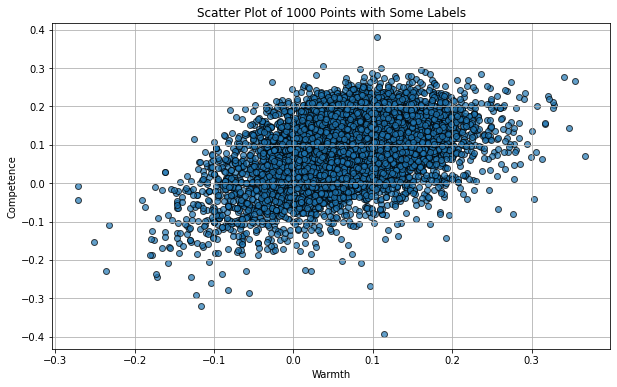

In [41]:

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(metaphor_df['warmth'], metaphor_df['comp'], alpha=0.7, edgecolor='k')

# # Labeling a few selected points with names
# labels = {10: "A", 200: "B", 500: "C", 750: "D", 999: "E"}

for index, label in metaphor_df.iterrows():
    if (label.warmth) >0.3:
        print(label.ai_metaphor)
        
print("NEGATIVE")
for index, label in metaphor_df.iterrows():
    if (label.warmth) <-0.3:
        print(label.ai_metaphor)
#         plt.text(label.warmth, label.comp, label.ai_metaphor, fontsize=12, ha='right')


plt.title("Scatter Plot of 1000 Points with Some Labels")
plt.xlabel("Warmth")
plt.ylabel("Competence")
plt.grid(True)
plt.show()

In [46]:
        
print("low warmth, low competence")
print('----')
for index, label in metaphor_df.iterrows():
    if ((label.warmth) <-0.1)&(label.comp < -0.1):
        print(label.ai_metaphor)

low warmth, low competence
----
It’s kinda like automating a process you don’t like doing
It's like the rising sea, it's inevitable
It grinds my gears
Sucks
Like a turtle trying to run like a rabbit.
Fool me once shame on you fool me twice shame on me.
I really can't think of anything
Taking candy from a baby.
Someone fills an excel spreadsheet with data and somehow shuffles it
Its a computer presicting the next word   It has no understanding
The downfall of human knowledge and society through the use of something that allows us not to think.
It's an echoing voice in a dark cavern that repeats back things you or others have said to it, but bereft of meaning and context.
Its just a computer baby
I don’t really have a metaphor. It’s just dangerous and bad. It’s going to completely eliminate some areas of work all together but do it poorly and with out any human element that makes it better. Yeah, the human error is gone but AI is still created by humans…so it’s a vicious cycle
Increadibl

In [47]:
        
print("low warmth, high competence")
for index, label in metaphor_df.iterrows():
    if ((label.warmth) <-0.1)&(label.comp > 0.1):
        print(label.ai_metaphor)

low warmth, high competence
A detective that collects clues from different recourses, analyzes them and uses that information to make a prediction or solve a problem


In [48]:
        
print("high warmth, high competence")
for index, label in metaphor_df.iterrows():
    if ((label.warmth) >0.1)&(label.comp > 0.1):
        print(label.ai_metaphor)

high warmth, high competence
genie in a bottle - you can ask it to do anything, and sometimes it's amazing, but it really depends on how you ask
AI is a choose-your-own-adventure book where you can design realities you want, read information, and create new possibilities
AI makes fewer medical mistakes
I think AI can be innovative and has a lot of advantages.
AI IS AS GOOD AS HUMAN BEINGS . AI DOES SO MANY THINGS ONLY HUMANS WERE CAPABLE OF.
AI is like a librarian, therapist, travel agent, and many other human type things all wrapped into a computer program
AI is a growing robot. It's able to adapt and to learn more and more.
AI brings back people to life. Basically we can see concerts live of people that have passed that we never thought we would be able to see.
AI works through thousands of years of knowledge acquired by humans. This knowledge has been digitalized and spread through the use of AI. AI capabilities are endless and the "digital mind" has an unlimited potential to acquir

Ai is similar to a tour guide. A tour guide has studied a region and its history through second-hand information through books, courses, etc. They do not have first-hand experience with the information they are telling others about. This is similar to AI in the sense that the program is giving information and help through other resources.
A good metaphor for AI to put simply, would be an electric brain. It has the ability to compute, understand, research, respond, and in some cases even experience “emotion” (or at least the context of emotion). It would be a similar human brain just experienced by a human through a computer instead of a body.
AI is like a grand library of a billion books, each filled with knowledge and stories. When you ask a question or seek assistance, AI's librarian swiftly flips through these books, weaving together passages from various tomes to craft a response tailored just for you. It's like having a wizard librarian at your service, conjuring wisdom from an en

AI is like having an assistant with all the answers.
AI helps make work much more easier and faster. It is an element on its own that can be put together by people to form a concrete meaning. For instance, users generate pictures from midjourney, get a voiceover with ChatGPT generating the script. They put it together and generate engaging videos.
AI works by absorbing all the knowledge it can and coming to a balanced conclusion.
AI is like a conversational, modern Wikipedia. It can be as specific or broad as you want depending on how you word your request.
Like a massive reddit engine. Many answers and help with many things
I see text related AI as a kind of assistant that you can use to help you brainstorm and do menial research tasks. An assistant doesn't take over or run the show. I would like to use Ai and the future to support me as an assistant might.
I would say a genie. You're asking an AI program something and it just conjures up a word or sentence for you in an instant, almo

In [49]:
        
print("high warmth, low competence")
for index, label in metaphor_df.iterrows():
    if ((label.warmth) >0.1)&(label.comp < -0.1):
        print(label.ai_metaphor)

high warmth, low competence
Indifferent
AI is like an emotionless slave.
it's like how you want your dog to talk.
your dog knows all about your every day moves, what you do, how you sound, what you eat and dont eat. we all want our dog to talk so we can interact with them and have a buddy that's giving unconditional love, but we don't want them to be able to go out to the neighbor and tell them what we think about them banging the walls at night and how much we hate them. too far? maybe.
AI are emotionless brains.
emotionless wall plain in it's understanding of human existence.
Like an imaginary friend
AI is a very unfeeling human robot thing
It's like trusting my best friend to help with problems
It's like a dog. On one hand, it can be gentle and loving. However, you don't know if it may suddenly bite.
